optimal j: 2
mean estimate: 0.2430769230769231
mean estimate: 0.5594405594405593
mean estimate: 0.7456598146767498
total reward earned: 7240.0
overall win rate: 0.724
num_times_explored: 977
num_times_exploited: 9023
num times selected optimal bandit: 9389


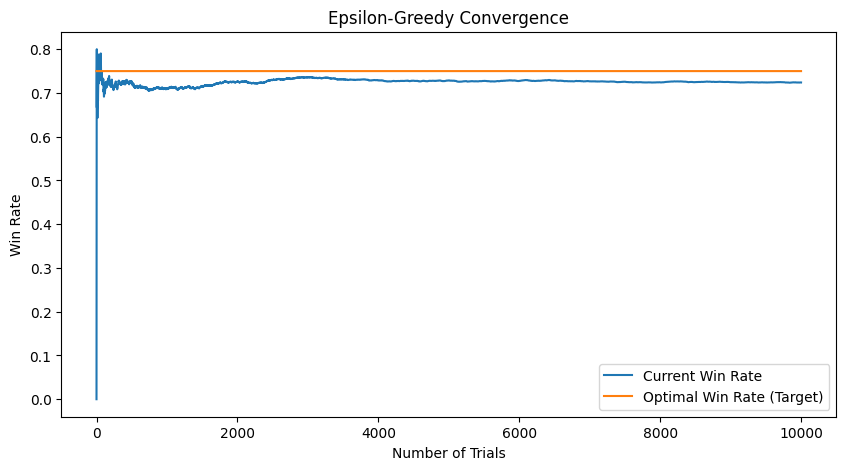

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 1. CONFIGURATION
NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.25, 0.5, 0.75]


class Bandit:
    def __init__(self, p):
        # p: the true win rate (unknown to the algorithm)
        self.p = p
        # p_estimate: our current guess of the win rate (mean reward)
        self.p_estimate = 0.
        # N: number of samples collected for this specific bandit
        self.N = 0.

    def pull(self):
        # Simulate a win (1) or loss (0) based on the true probability p
        return np.random.random() < self.p

    def update(self, x):
        # Update the running average (p_estimate) using the latest result x
        self.N += 1.
        # This formula calculates the new mean without storing all previous results
        self.p_estimate = ((self.N - 1) * self.p_estimate + x) / self.N


def experiment():
    # Initialize the bandits with their true win rates
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

    rewards = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0

    # Identify the best bandit for tracking performance
    optimal_j = np.argmax([b.p for b in bandits])
    print("optimal j:", optimal_j)

    # 2. MAIN SIMULATION LOOP
    for i in range(NUM_TRIALS):

        # Epsilon-Greedy Logic
        if np.random.random() < EPS:
            # EXPLORATION: Choose a random bandit
            num_times_explored += 1
            j = np.random.randint(len(bandits))
        else:
            # EXPLOITATION: Choose the best bandit according to current knowledge
            num_times_exploited += 1
            j = np.argmax([b.p_estimate for b in bandits])

        if j == optimal_j:
            num_optimal += 1

        # Action: Pull the lever and observe the reward x
        x = bandits[j].pull()
        rewards[i] = x

        # Learning: Update the bandit's estimate with the new reward
        bandits[j].update(x)

    # 3. PRINT FINAL ESTIMATES
    for b in bandits:
        print("mean estimate:", b.p_estimate)

    # Summary Statistics
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num_times_explored:", num_times_explored)
    print("num_times_exploited:", num_times_exploited)
    print("num times selected optimal bandit:", num_optimal)

    # 4. PLOT THE RESULTS
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)

    plt.figure(figsize=(10, 5))
    plt.plot(win_rates, label="Current Win Rate")
    plt.plot(np.ones(NUM_TRIALS) * np.max(BANDIT_PROBABILITIES), label="Optimal Win Rate (Target)")
    plt.legend()
    plt.title("Epsilon-Greedy Convergence")
    plt.xlabel("Number of Trials")
    plt.ylabel("Win Rate")
    plt.show()


if __name__ == "__main__":
    experiment()